In [1]:
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
from nltk.corpus import stopwords
import os
import nltk
import os
import itertools
from nltk import word_tokenize
import string
import pandas as pd
default_stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lokes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set_style("darkgrid")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.stem import PorterStemmer
from matplotlib import cm

from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings('ignore')

In [3]:
all_data = pd.read_csv('Huff_news.csv',  header = 0 , parse_dates = True, index_col = 0)

all_data.dropna(inplace = True)

all_data["text_all"] = all_data["headline"] +" "+ all_data["short_description"]

text_all = all_data["text_all"]

In [4]:
def clean_text(doc,
            rm_punctuation=True,
            rm_digits=True,
            lemmatize=False,
            norm_case=True,
            stem=False,
            rm_stopwords=True):
            """
            Creates a cleaned list of words with the given options
            Python 3 friendly

            in:
                a single text string (eg representing an article)
            out:
                same text but cleaned according to given options

            """
            # Doc overall operations
            if(rm_digits==True):
                table = str.maketrans({key: None for key in string.digits})
                doc = str(doc).translate(table)
            if(norm_case==True):
                doc = doc.lower()
            if(rm_punctuation==True):
                table = str.maketrans({key: None for key in string.punctuation})
                doc = doc.translate(table)
            if(rm_stopwords==True):
                words = " ".join([i for i in doc.split() if i not in default_stopwords])
            else:
                words = " ".join([i for i in doc.split()])
            if(lemmatize==True):
                words = " ".join(lemma.lemmatize(word) for word in words.split())
            if(stem==True):
                words = " ".join(porter_stemmer.stem(word) for word in words.split())
            return words

In [5]:
documents = [clean_text(x,stem=False,lemmatize=False) for x in all_data.text_all]

In [6]:
X, y =documents, all_data.category

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=3800, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [9]:
#tf idf
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
#Logit model
logistic = LogisticRegression()
logistic.fit(X_train, y_train) 

# test - prediction

logistic_prediction = logistic.predict(X_test)


#accuracy score
print(accuracy_score(logistic_prediction, y_test))


#confusion matrix
logit_confusionmatrix=confusion_matrix(logistic_prediction, y_test)



#classification report
print(classification_report(logistic_prediction, y_test))

0.47731691510045365
                precision    recall  f1-score   support

          ARTS       0.44      0.68      0.53        73
  BLACK VOICES       0.08      0.40      0.13        10
      BUSINESS       0.59      0.53      0.56       236
       COLLEGE       0.23      0.50      0.31        32
        COMEDY       0.00      0.00      0.00         0
         CRIME       0.00      0.00      0.00         0
     EDUCATION       0.44      0.68      0.54        47
 ENTERTAINMENT       0.53      0.57      0.55       131
         FIFTY       0.19      0.45      0.27        58
     GOOD NEWS       0.00      0.00      0.00         0
         GREEN       0.46      0.74      0.57        74
HEALTHY LIVING       0.77      0.37      0.50       672
        IMPACT       0.26      0.33      0.29       152
 LATINO VOICES       0.00      0.00      0.00         0
         MEDIA       0.06      1.00      0.11         2
       PARENTS       0.65      0.50      0.56       241
      POLITICS       0.78  

In [15]:
from sklearn.metrics import precision_recall_fscore_support as score
p,r,f1,s=score(y_test,logistic_prediction )
a=pd.Series(f1).sort_values(ascending=False).head(3).index.to_list()
all_labels=y.unique()
all_labels.sort()
list(all_labels[a])
# Top 3 categories predicted from logit model with respect to the f1 score

['TASTE', 'TRAVEL', 'QUEER VOICES']

In [16]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix

In [17]:
def evaluate_model(model):
     model.fit(X_train, y_train)
     cr = ClassificationReport(model)
     cr.score(X_test, y_test)
     cr.finalize()

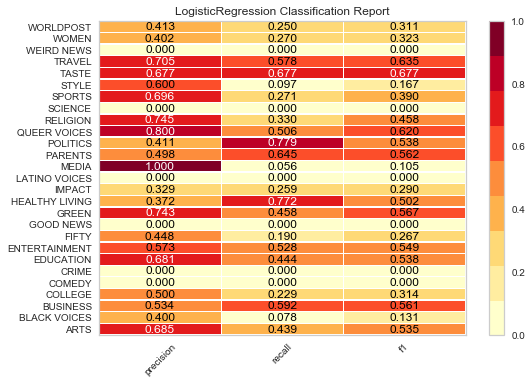

In [18]:
evaluate_model(LogisticRegression())

In [19]:
 # Naive Bayes Classifier

# Naive Bayes 


nb =  GaussianNB()
nb.fit(X_train, y_train) 

nb_prediction = nb.predict(X_test)



print(accuracy_score(nb_prediction, y_test))


nb_confusionmatrix=confusion_matrix(nb_prediction, y_test)

#classification report
print(classification_report(nb_prediction, y_test))


0.25016202203499677
                precision    recall  f1-score   support

          ARTS       0.21      0.25      0.23        97
  BLACK VOICES       0.00      0.00      0.00         5
      BUSINESS       0.34      0.23      0.27       314
       COLLEGE       0.07      0.23      0.11        22
        COMEDY       0.04      0.12      0.06        17
         CRIME       0.00      0.00      0.00         1
     EDUCATION       0.04      0.12      0.06        24
 ENTERTAINMENT       0.28      0.32      0.30       125
         FIFTY       0.14      0.16      0.15       120
     GOOD NEWS       0.00      0.00      0.00         1
         GREEN       0.16      0.28      0.20        68
HEALTHY LIVING       0.31      0.25      0.27       400
        IMPACT       0.19      0.13      0.16       281
 LATINO VOICES       0.00      0.00      0.00         0
         MEDIA       0.00      0.00      0.00         8
       PARENTS       0.20      0.22      0.21       172
      POLITICS       0.60  

In [20]:
p_nb,r_nb,f1_nb,s_nb=score(y_test,nb_prediction )
b=pd.Series(f1_nb).sort_values(ascending=False).head(3).index.to_list()
all_labels=y.unique()
all_labels.sort()
list(all_labels[b])
# Top 3 predictions from NB classifier

['TASTE', 'POLITICS', 'ENTERTAINMENT']

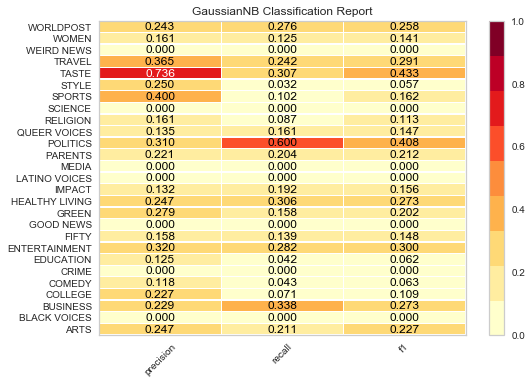

In [21]:
evaluate_model(GaussianNB())

In [22]:
from sklearn.svm import SVC

SVC_model = SVC()

SVC_model.fit(X_train, y_train)

SVC_prediction = SVC_model.predict(X_test)


print(accuracy_score(SVC_prediction, y_test))


svc_confusionmatix=confusion_matrix(SVC_prediction, y_test)


print(classification_report(SVC_prediction, y_test))

0.44167206740116655
                precision    recall  f1-score   support

          ARTS       0.34      0.76      0.47        51
  BLACK VOICES       0.12      0.60      0.20        10
      BUSINESS       0.54      0.56      0.55       202
       COLLEGE       0.23      0.55      0.32        29
        COMEDY       0.02      1.00      0.04         1
         CRIME       0.00      0.00      0.00         0
     EDUCATION       0.44      0.71      0.55        45
 ENTERTAINMENT       0.48      0.58      0.53       117
         FIFTY       0.12      0.53      0.19        30
     GOOD NEWS       0.00      0.00      0.00         0
         GREEN       0.42      0.80      0.55        64
HEALTHY LIVING       0.82      0.31      0.45       858
        IMPACT       0.21      0.34      0.26       119
 LATINO VOICES       0.00      0.00      0.00         0
         MEDIA       0.03      1.00      0.05         1
       PARENTS       0.56      0.51      0.53       203
      POLITICS       0.83  

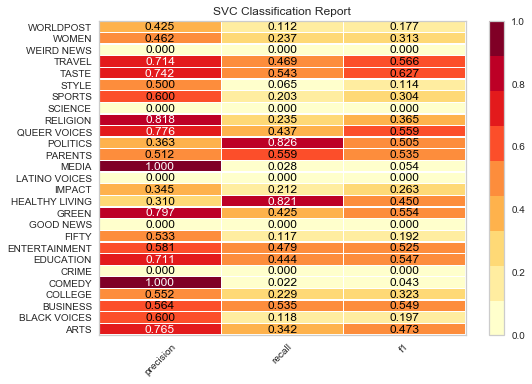

In [23]:
evaluate_model(SVC())

In [28]:
p_svc,r_svc,f1_svc,s_svc=score(y_test,SVC_prediction )
c=pd.Series(f1_svc).sort_values(ascending=False).head(3).index.to_list()
all_labels=y.unique()
all_labels.sort()
list(all_labels[c])
# Top 3 predictions from SVC classifier

['TASTE', 'TRAVEL', 'QUEER VOICES']